In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import PowerNorm
from matplotlib.colors import Normalize
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Set the display options
pd.set_option('display.max_rows', None)  # Unrestricted number of rows
pd.set_option('display.max_columns', None)  # Unrestricted number of columns
pd.set_option('display.width', None)  # Use maximum screen width
pd.set_option('display.max_colwidth', None)  # Unrestricted column width

# normalisation
def normalize_data(df):
    df["weight"] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())
    df["recovery"] = (df['recovery'] - df['recovery'].min()) / (df['recovery'].max() - df['recovery'].min())
    df["speed"] = (df['speed'] - df['speed'].min()) / (df['speed'].max() - df['speed'].min())
    df["combo_game"] = (df['combo_game'] - df['combo_game'].min()) / (df['combo_game'].max() - df['combo_game'].min())
    df["projectiles"] = (df['projectiles'] - df['projectiles'].min()) / (df['projectiles'].max() - df['projectiles'].min())
    df["killpower"] = 1 - ((df['killpower'] - df['killpower'].min()) / (df['killpower'].max() - df['killpower'].min()))
    df["ledgetrap"] = (df['ledgetrap'] - df['ledgetrap'].min()) / (df['ledgetrap'].max() - df['ledgetrap'].min())
    df["edgeguard"] = (df['edgeguard'] - df['edgeguard'].min()) / (df['edgeguard'].max() - df['edgeguard'].min())
    df["spacing"] = (df['spacing'] - df['spacing'].min()) / (df['spacing'].max() - df['spacing'].min())
    df["cheese"] = (df['cheese'] - df['cheese'].min()) / (df['cheese'].max() - df['cheese'].min())
    df["popularity"] = (df['popularity'] - df['popularity'].min()) / (df['popularity'].max() - df['popularity'].min())
    df["pro_scene"] = (df['pro_scene'] - df['pro_scene'].min()) / (df['pro_scene'].max() - df['pro_scene'].min())
    df["online_winrate"] = (df['online_winrate'] - df['online_winrate'].min()) / (df['online_winrate'].max() - df['online_winrate'].min())
    df["easy"] = 1 - ((df['easy'] - df['easy'].min()) / (df['easy'].max() - df['easy'].min()))
    return df

def read_data(file='smash.csv'):
    df = pd.read_csv(file, sep=',')
    df['name'] = df['name'].str.strip()
    df = df.set_index('name')
    df = df.drop(columns="id")
    df = df.replace({'': 0, ' x': 0, 'x': 0, 'x ': 0, np.nan: 0, ' ':0, '  ':0})
    for column in ['weight', 'recovery', 'speed', 'combo_game', 'projectiles', 'killpower', 'ledgetrap', 'edgeguard', 'spacing', 'cheese', 'easy', 'popularity', 'pro_scene', 'online_winrate']:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

def drop_columns(df, columns):
    """Drop specified columns from DataFrame."""
    return df.drop(columns=columns)

df = read_data()
df = normalize_data(df)
columns_order = ['weight', 'recovery', 'spacing', 'projectiles', 'speed', 'combo_game', 'killpower', 'edgeguard', 'ledgetrap', 'cheese', 'easy', 'popularity', 'pro_scene', 'online_winrate']
df = df[columns_order]
df

,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,popularity,pro_scene,online_winrate
name,,,,,,,,,,,,,,
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,0.386534,0.7,0.446222
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,1.0,0.876340,0.391521,0.2,0.620889
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,0.349127,0.4,0.482222
Samus,0.630137,0.625,0.25,1.00,0.375,0.115385,0.274510,0.407407,0.675,0.4,0.722526,0.498753,0.7,0.612444
Yoshi,0.575342,0.750,0.00,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,0.433915,0.7,0.580889
Kirby,0.232877,0.250,0.00,0.00,0.250,0.423077,0.352941,0.351852,0.150,0.8,0.902752,0.224439,0.1,0.257778
Fox,0.205479,0.250,0.00,0.25,0.875,0.576923,0.803922,0.037037,0.350,0.4,0.346694,0.199501,0.9,0.400444
Pikachu,0.232877,1.000,0.00,0.50,0.625,0.269231,0.333333,0.685185,0.175,1.0,0.341482,0.331671,0.8,0.397333
Luigi,0.479452,0.250,0.00,0.25,0.250,0.769231,0.980392,0.166667,0.150,1.0,0.443963,0.478803,0.5,0.754222


In [4]:
def plot_character_vs_median(df, character_name):
    try:
        # Get data for specific character
        character_data = df.loc[character_name].tolist() + [df.loc[character_name].tolist()[0]]

        # Calculate the median data
        median_data = df.median().tolist() + [df.median().tolist()[0]]

        # Compute angle for each axis
        num_vars = len(df.columns)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        # Plot for specific character
        ax.fill(angles, character_data, color='red', alpha=0.25)
        ax.plot(angles, character_data, color='red', label=character_name)
        # Plot for median
        ax.fill(angles, median_data, color='green', alpha=0.25)
        ax.plot(angles, median_data, color='green', label='Median')

        # Set the range of the radar
        ax.set_ylim(0, 1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(df.columns, fontsize=13)
        ax.set_yticklabels([])
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
        
        # Save the plot as an image file
        plt.title(f"{character_name} vs Median", size=20)
        plt.savefig(f"character_radars/{character_name}_vs_median.png")  # Save the figure to a file
        plt.close(fig)  # Close the figure to free up memory

    except KeyError:
        print(f"Character '{character_name}' not found in the DataFrame. Please check the character name and try again.")

# Plot and save radar charts for each character
# for character_name in df.index:
#     plot_character_vs_median(df, character_name)

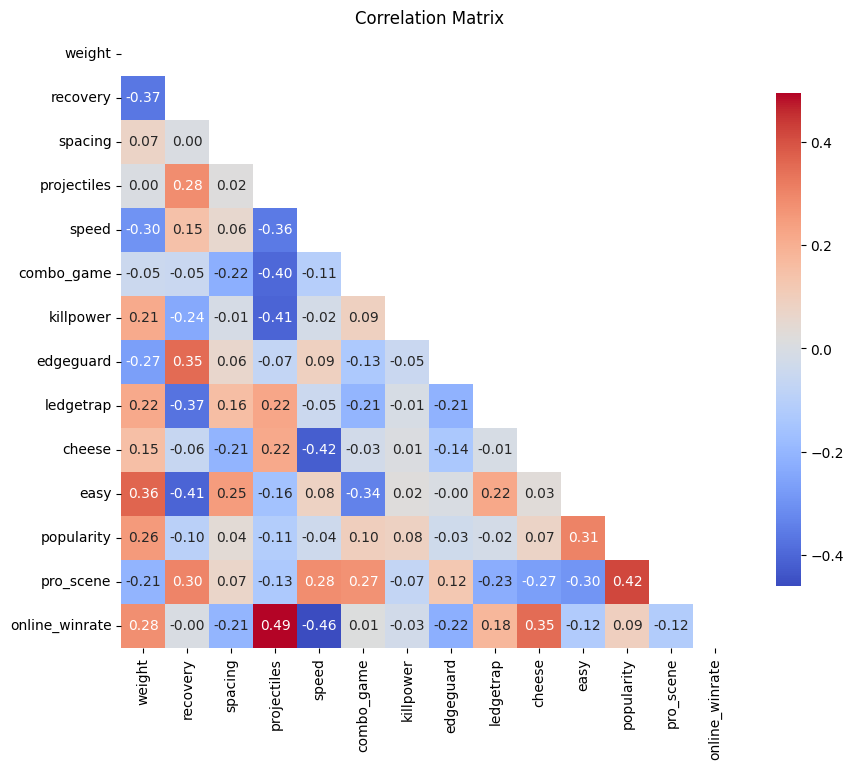

In [5]:
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
# Plot the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

In [6]:
# not wanted for clustering
# columns_to_drop = ['popularity', 'online_winrate']  # Add 'easy', 'cheese', 'pro_scene' if needed
# df = drop_columns(df, columns_to_drop)

In [7]:
def calculate_clustering_metrics(df, k_range):
    """Calculate KMeans clustering metrics over a range of k values."""
    sse = []
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(df)
        sse.append(kmeans.inertia_)
        silhouette = silhouette_score(df, clusters)
        silhouette_scores.append(silhouette)
    return sse, silhouette_scores

def plot_metrics(k_range, sse, silhouette_scores):
    """Plot SSE and Silhouette Scores to help determine the optimal number of clusters."""
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores For Different k')
    plt.show()

def perform_clustering(df, n_clusters):
    """Perform KMeans clustering and add cluster assignments back to DataFrame."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(df)
    df['Cluster'] = clusters
    return df

def apply_dbscan(df, eps=0.5, min_samples=5):
    """Apply DBSCAN clustering to DataFrame."""
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data_scaled)
    df['Cluster'] = clusters
    return df, clusters

def plot_dbscan_results(df, clusters):
    """Plot DBSCAN results."""
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
    plt.title('DBSCAN Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()

def print_clusters(df):
    """Print each cluster and its characters."""
    cluster_groups = df.groupby('Cluster')['Cluster'].apply(lambda x: list(x.index))
    for cluster, characters in cluster_groups.items():
        print(f"Cluster {cluster}: {', '.join(characters)}")
        print()

        
# I did not manage to get proper clusters that make sense. Abandonned.

# DBSCAN Clustering
# df, clusters = apply_dbscan(df, eps=2.4, min_samples=3)
# plot_dbscan_results(df, clusters)

# KNN Clustering
# k_range = range(2, 15)
# sse, silhouette_scores = calculate_clustering_metrics(df, k_range)
# plot_metrics(k_range, sse, silhouette_scores)

print("Clusters are not really satisfying, to review later.")
print()
print()

n_clusters = 6
df = perform_clustering(df, n_clusters)
display(df.head())
print_clusters(df)

Clusters are not really satisfying, to review later.




,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,popularity,pro_scene,online_winrate,Cluster
name,,,,,,,,,,,,,,,
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,0.386534,0.7,0.446222,3
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,1.0,0.876340,0.391521,0.2,0.620889,2
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,0.349127,0.4,0.482222,4
Samus,0.630137,0.625,0.25,1.00,0.375,0.115385,0.274510,0.407407,0.675,0.4,0.722526,0.498753,0.7,0.612444,4
Yoshi,0.575342,0.750,0.00,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,0.433915,0.7,0.580889,3


Cluster 0: Peach, Sheik, Marth, Meta Knight, Pit, Zero Suit Samus, Wario, Pokemon Trainer, Diddy Kong, Sonic, Greninja, Shulk, Joker

Cluster 1: Bowser, Falco, Lucina, Roy, Chrom, Ike, Wolf, Palutena, Cloud, Corrin, Byleth, Sephiroth, Pyra Mythra, Sora

Cluster 2: Donkey Kong, Kirby, Jigglypuff, Dr. Mario, Ganondorf, Little Mac, Ridley, King K. Rool, Incineroar

Cluster 3: Mario, Yoshi, Fox, Luigi, Captain Falcon, Ice Climbers, Mii Brawler, Ryu, Ken, Terry, Kazuya

Cluster 4: Link, Samus, Ness, Zelda, Young Link, Mewtwo, Lucas, King Dedede, Olimar, Toon Link, Villager, Megaman, Wii Fit Trainer, Rosalina & Luma, Mii Swordfighter, Mii Gunner, Robin, Bowser Jr., Duck Hunt, Simon, Isabelle, Piranha Plant, Hero, Banjo & Kazooie, Min Min

Cluster 5: Pikachu, Pichu, Mr. Game & Watch, Snake, Lucario, R.O.B., Pac-Man, Bayonetta, Inkling, Steve



/home/g.touati/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


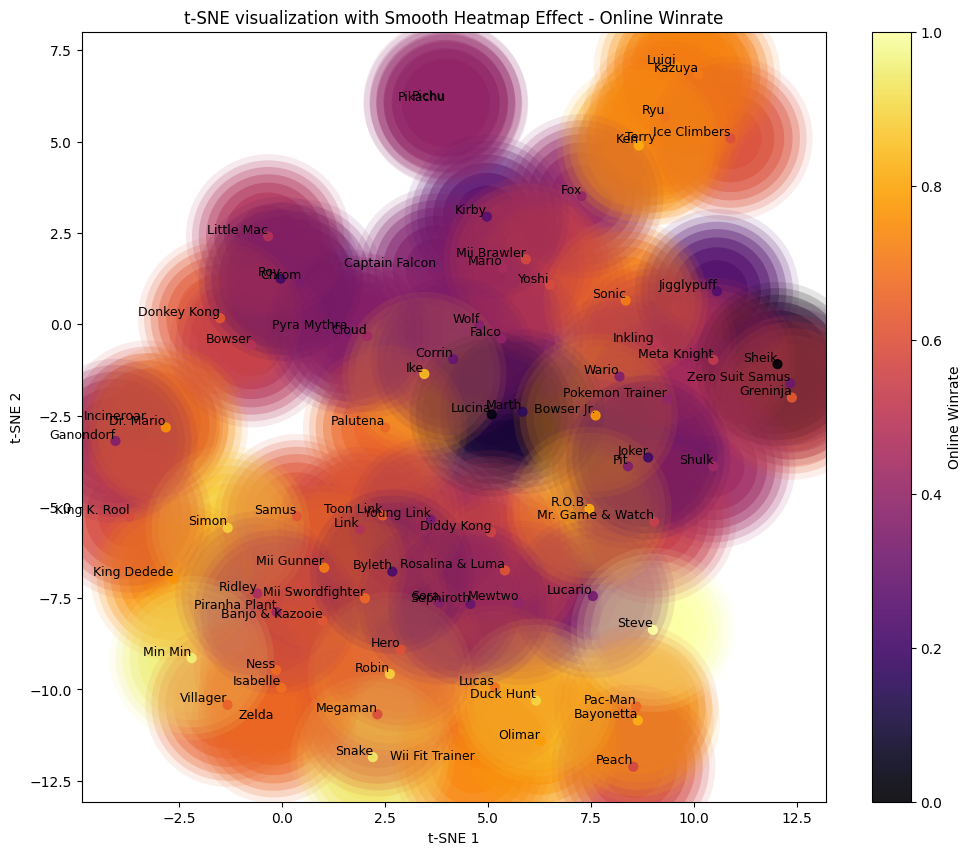

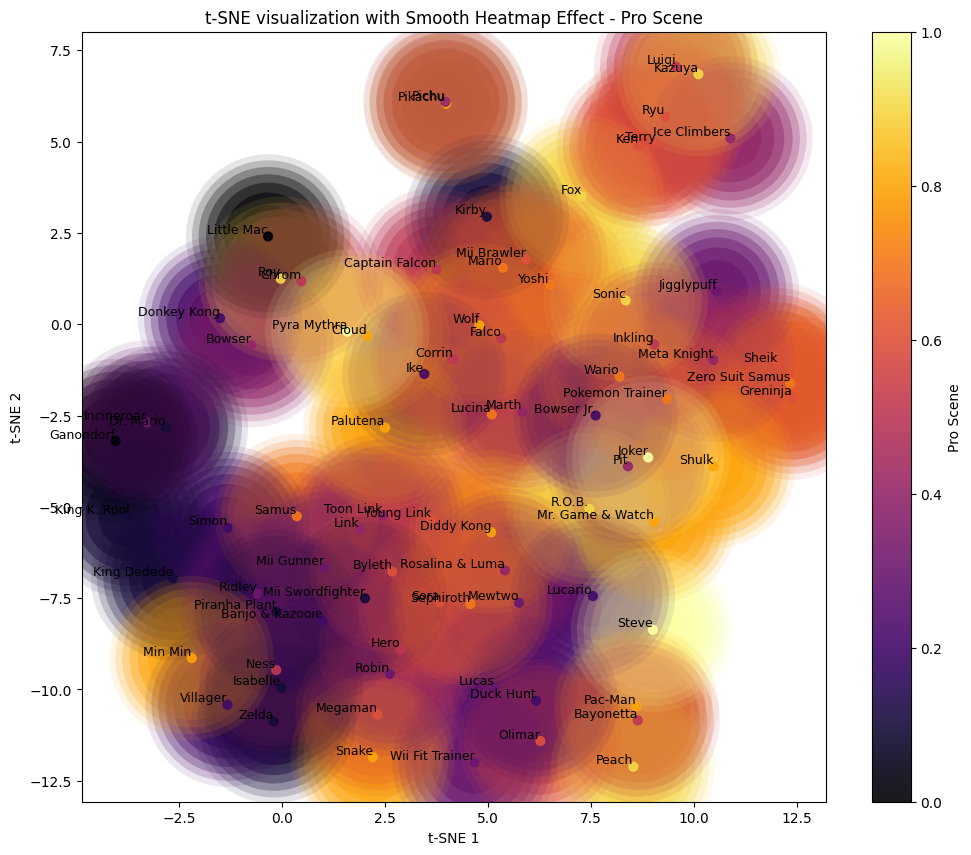

In [8]:
def prepare_data(df, columns_to_drop):
    """Standardize the data excluding the specified columns. Works on a copy to keep original DataFrame intact."""
    df_copy = df.copy()  # Create a copy of the DataFrame to keep original DataFrame unchanged
    df_copy.index.name = 'name'
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df_copy.drop(columns_to_drop, axis=1))
    return data_scaled

def compute_tsne(data_scaled, n_components=2, perplexity=17, learning_rate=200, n_iter=10000, random_state=42):
    """Compute t-SNE embedding of the dataset."""
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=random_state)
    tsne_results = tsne.fit_transform(data_scaled)
    return tsne_results

def plot_tsne_heatmap(tsne_results, labels, names, label_name, glow_size_factor=1.0, title='t-SNE Heatmap Visualization'):
    """Plot t-SNE results with smooth color erosion."""
    cmap = plt.cm.inferno  # High-contrast colormap
    norm = Normalize(vmin=min(labels), vmax=max(labels))  # Normalize color scale

    plt.figure(figsize=(12, 10))
    # Fine-tuned glow effect
    num_layers = 7  # Increased number of layers for smoother gradient
    base_size = 20  # Starting size for the smallest layer
    alpha_values = np.linspace(0.6, 0.1, num_layers)  # Linear space for alpha values
    sizes = [base_size * (i + 1) * glow_size_factor for i in range(num_layers)]  # Incremental sizes

    for size, alpha in zip(sizes, alpha_values):
        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=size, c=labels, cmap=cmap, norm=norm, alpha=alpha, edgecolor='none')

    # Main scatter plot for the actual points with labels
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=40, c=labels, cmap=cmap, norm=norm, alpha=0.9)

    # Adding labels to each point
    for i, txt in enumerate(names):
        plt.annotate(txt, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, ha='right', va='bottom')

    plt.colorbar(scatter, label=label_name)
    plt.title(title)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

# Example usage
columns_to_drop = ['Cluster', 'popularity', 'pro_scene', 'online_winrate']
data_scaled = prepare_data(df, columns_to_drop)
tsne_results = compute_tsne(data_scaled)

# Plot for online winrate
plot_tsne_heatmap(tsne_results, df['online_winrate'], df.index, 'Online Winrate', glow_size_factor=100, title='t-SNE visualization with Smooth Heatmap Effect - Online Winrate')

# Plot for pro scene
plot_tsne_heatmap(tsne_results, df['pro_scene'], df.index, 'Pro Scene', glow_size_factor=100, title='t-SNE visualization with Smooth Heatmap Effect - Pro Scene')

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance

def drop_columns(df, columns_to_drop):
    """Drop specified columns from DataFrame and return new DataFrame."""
    return df.drop(columns=columns_to_drop)

def find_closest_characters(df, character_name, top_n=5):
    """
    Finds the closest characters in the dataset based on Euclidean distance.
    Args:
    df (pd.DataFrame): DataFrame containing all characters and their features.
    character_name (str): Name of the character to find the closest matches for.
    top_n (int): Number of closest characters to return.

    Returns:
    pd.DataFrame: DataFrame containing the details and distances of the closest characters.
    """
    # Normalize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)  # Preserve the index

    # Select the target character features
    target_character = df_scaled.loc[character_name]

    # Calculate the Euclidean distances from the target to all others
    distances = df_scaled.apply(lambda x: distance.euclidean(x, target_character), axis=1)

    # Ignore the self distance by setting it to infinity
    distances[character_name] = float('inf')

    # Find the indices of the top_n closest characters
    closest_indices = distances.nsmallest(top_n).index
    closest_distances = distances.loc[closest_indices]

    # Return the details of the closest characters, include distances
    result = df.loc[closest_indices].copy()
    result['Distance'] = closest_distances.values

    return result

# Example usage
columns_to_drop = ['popularity', 'online_winrate', 'pro_scene', 'Cluster']  # Adjust as needed
df = drop_columns(df, columns_to_drop)

# Loop through each character in the DataFrame and perform the analysis
for character_name in df.index:
    closest_characters = find_closest_characters(df, character_name)
    # print(f"Details of the given character '{character_name}':")
    # display(df.loc[character_name])
    # print(f"\nThe {closest_characters.shape[0]} closest characters to '{character_name}' along with their distances are:")
    # display(closest_characters)
    
    # Save each result to a CSV file named after the character
    closest_characters.to_csv(f'comparaisons/closest_to_{character_name}.csv')

Details of the given character 'Mario':


weight         0.493151
recovery       0.375000
spacing        0.000000
projectiles    0.250000
speed          0.500000
combo_game     0.538462
killpower      0.470588
edgeguard      0.277778
ledgetrap      0.300000
cheese         0.400000
easy           0.827842
Name: Mario, dtype: float64


The 5 closest characters to 'Mario' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mii Brawler,0.438356,0.50,0.0,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,1.559960
Yoshi,0.575342,0.75,0.0,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,1.919027
Wolf,0.410959,0.50,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,1.951739
Captain Falcon,0.575342,0.25,0.0,0.00,0.750,0.346154,0.568627,0.425926,0.525,0.2,0.603246,2.653161
Falco,0.273973,0.25,0.5,0.25,0.500,0.538462,0.666667,0.462963,0.275,0.2,0.527785,2.690754


Details of the given character 'Donkey Kong':


weight         0.890411
recovery       0.125000
spacing        0.750000
projectiles    0.000000
speed          0.625000
combo_game     0.500000
killpower      0.862745
edgeguard      0.259259
ledgetrap      0.425000
cheese         1.000000
easy           0.876340
Name: Donkey Kong, dtype: float64


The 5 closest characters to 'Donkey Kong' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Roy,0.452055,0.250,1.00,0.0,0.750,0.423077,0.784314,0.185185,0.425,0.8,0.741773,2.800259
Bowser,1.000000,0.250,0.50,0.0,0.625,0.384615,0.627451,0.259259,0.525,0.2,0.984310,3.201227
Incineroar,0.739726,0.125,0.25,0.0,0.000,0.423077,0.725490,0.259259,0.525,1.0,0.741651,3.290978
Ridley,0.616438,0.250,0.50,0.5,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,3.351961
Chrom,0.452055,0.125,1.00,0.0,0.750,0.307692,0.784314,0.296296,0.600,0.4,0.782628,3.591976


Details of the given character 'Link':


weight         0.575342
recovery       0.500000
spacing        0.750000
projectiles    1.000000
speed          0.375000
combo_game     0.192308
killpower      0.568627
edgeguard      0.240741
ledgetrap      0.525000
cheese         0.200000
easy           0.482454
Name: Link, dtype: float64


The 5 closest characters to 'Link' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Toon Link,0.397260,0.500,0.50,1.00,0.500,0.192308,0.470588,0.314815,0.475,0.2,0.661764,1.642512
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.361723
Byleth,0.479452,0.500,1.00,0.50,0.125,0.307692,0.705882,0.370370,0.500,0.4,0.660739,2.471571
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.544535
Robin,0.452055,0.625,0.75,1.00,0.125,0.153846,0.647059,0.314815,0.250,0.6,0.373560,2.616009


Details of the given character 'Samus':


weight         0.630137
recovery       0.625000
spacing        0.250000
projectiles    1.000000
speed          0.375000
combo_game     0.115385
killpower      0.274510
edgeguard      0.407407
ledgetrap      0.675000
cheese         0.400000
easy           0.722526
Name: Samus, dtype: float64


The 5 closest characters to 'Samus' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Toon Link,0.397260,0.500,0.50,1.00,0.500,0.192308,0.470588,0.314815,0.475,0.2,0.661764,2.427727
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,2.554751
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,2.723651
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.837633
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.874374


Details of the given character 'Yoshi':


weight         0.575342
recovery       0.750000
spacing        0.000000
projectiles    0.250000
speed          0.625000
combo_game     0.346154
killpower      0.568627
edgeguard      0.314815
ledgetrap      0.275000
cheese         0.400000
easy           0.798536
Name: Yoshi, dtype: float64


The 5 closest characters to 'Yoshi' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mii Brawler,0.438356,0.500,0.0,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,1.747719
Mario,0.493151,0.375,0.0,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,1.919027
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.201375
Inkling,0.438356,1.000,0.0,0.50,0.625,0.500000,0.647059,0.685185,0.200,0.6,0.625689,2.630217
Sonic,0.328767,0.875,0.0,0.00,1.000,0.384615,0.450980,0.592593,0.300,0.4,0.740311,2.680615


Details of the given character 'Kirby':


weight         0.232877
recovery       0.250000
spacing        0.000000
projectiles    0.000000
speed          0.250000
combo_game     0.423077
killpower      0.352941
edgeguard      0.351852
ledgetrap      0.150000
cheese         0.800000
easy           0.902752
Name: Kirby, dtype: float64


The 5 closest characters to 'Kirby' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mario,0.493151,0.375,0.0,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,2.709886
Mii Brawler,0.438356,0.500,0.0,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,2.819360
Dr. Mario,0.493151,0.000,0.0,0.25,0.125,0.423077,0.607843,0.444444,0.450,1.0,0.692540,3.159388
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,3.379977
Ridley,0.616438,0.250,0.5,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,3.537878


Details of the given character 'Fox':


weight         0.205479
recovery       0.250000
spacing        0.000000
projectiles    0.250000
speed          0.875000
combo_game     0.576923
killpower      0.803922
edgeguard      0.037037
ledgetrap      0.350000
cheese         0.400000
easy           0.346694
Name: Fox, dtype: float64


The 5 closest characters to 'Fox' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mii Brawler,0.438356,0.500,0.0,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,3.196400
Falco,0.273973,0.250,0.5,0.25,0.500,0.538462,0.666667,0.462963,0.275,0.2,0.527785,3.207199
Ken,0.561644,0.375,0.0,0.50,0.375,0.576923,1.000000,0.111111,0.525,0.2,0.178378,3.470428
Greninja,0.356164,0.875,0.5,0.25,0.875,0.307692,0.725490,0.296296,0.350,0.0,0.377885,3.619183
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,3.643698


Details of the given character 'Pikachu':


weight         0.232877
recovery       1.000000
spacing        0.000000
projectiles    0.500000
speed          0.625000
combo_game     0.269231
killpower      0.333333
edgeguard      0.685185
ledgetrap      0.175000
cheese         1.000000
easy           0.341482
Name: Pikachu, dtype: float64


The 5 closest characters to 'Pikachu' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Pichu,0.000000,1.000,0.00,0.50,0.500,0.423077,0.470588,0.592593,0.250,1.0,0.342654,1.862549
Inkling,0.438356,1.000,0.00,0.50,0.625,0.500000,0.647059,0.685185,0.200,0.6,0.625689,2.902697
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,3.075152
Mr. Game & Watch,0.178082,1.000,0.75,0.50,0.500,0.538462,0.352941,0.703704,0.175,0.8,0.759588,3.199458
Pac-Man,0.452055,1.000,0.00,0.75,0.375,0.576923,0.176471,0.277778,0.225,1.0,0.231614,3.236674


Details of the given character 'Luigi':


weight         0.479452
recovery       0.250000
spacing        0.000000
projectiles    0.250000
speed          0.250000
combo_game     0.769231
killpower      0.980392
edgeguard      0.166667
ledgetrap      0.150000
cheese         1.000000
easy           0.443963
Name: Luigi, dtype: float64


The 5 closest characters to 'Luigi' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Kazuya,0.698630,0.500,0.0,0.25,0.000,1.000000,0.901961,0.111111,0.200,0.8,0.132400,2.704321
Ryu,0.561644,0.375,0.0,0.50,0.250,0.576923,0.666667,0.018519,0.175,0.4,0.181473,3.165119
Terry,0.630137,0.250,0.0,0.25,0.250,0.692308,0.725490,0.148148,0.525,0.4,0.409790,3.415850
Steve,0.410959,0.875,0.5,0.75,0.000,0.576923,0.745098,0.185185,0.275,1.0,0.229489,3.743628
Dr. Mario,0.493151,0.000,0.0,0.25,0.125,0.423077,0.607843,0.444444,0.450,1.0,0.692540,3.782472


Details of the given character 'Ness':


weight         0.438356
recovery       0.500000
spacing        0.250000
projectiles    0.750000
speed          0.250000
combo_game     0.230769
killpower      0.549020
edgeguard      0.351852
ledgetrap      0.575000
cheese         0.800000
easy           0.703442
Name: Ness, dtype: float64


The 5 closest characters to 'Ness' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Isabelle,0.356164,0.500,0.00,1.00,0.250,0.307692,0.549020,0.370370,0.475,0.8,0.630153,1.354211
Zelda,0.315068,0.750,0.25,1.00,0.250,0.076923,0.784314,0.277778,0.500,0.8,0.719762,2.046379
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.161766
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,2.302506
Villager,0.410959,0.500,0.00,1.00,0.250,0.038462,0.705882,0.666667,0.450,0.6,0.596051,2.478927


Details of the given character 'Captain Falcon':


weight         0.575342
recovery       0.250000
spacing        0.000000
projectiles    0.000000
speed          0.750000
combo_game     0.346154
killpower      0.568627
edgeguard      0.425926
ledgetrap      0.525000
cheese         0.200000
easy           0.603246
Name: Captain Falcon, dtype: float64


The 5 closest characters to 'Captain Falcon' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mario,0.493151,0.375,0.0,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,2.653161
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.728414
Palutena,0.397260,0.500,0.5,0.50,0.625,0.346154,0.509804,0.481481,0.600,0.2,0.884630,2.765462
Yoshi,0.575342,0.750,0.0,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,2.769559
Mii Brawler,0.438356,0.500,0.0,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,2.956272


Details of the given character 'Jigglypuff':


weight         0.082192
recovery       0.375000
spacing        0.000000
projectiles    0.000000
speed          0.125000
combo_game     0.461538
killpower      0.686275
edgeguard      1.000000
ledgetrap      0.050000
cheese         0.400000
easy           0.563185
Name: Jigglypuff, dtype: float64


The 5 closest characters to 'Jigglypuff' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Meta Knight,0.246575,1.000,0.25,0.00,0.625,0.500000,0.843137,0.759259,0.250,0.2,0.430117,3.855553
Falco,0.273973,0.250,0.50,0.25,0.500,0.538462,0.666667,0.462963,0.275,0.2,0.527785,3.892538
Wario,0.630137,0.625,0.25,0.00,0.375,0.576923,0.647059,0.574074,0.225,0.4,0.466675,4.131692
Kirby,0.232877,0.250,0.00,0.00,0.250,0.423077,0.352941,0.351852,0.150,0.8,0.902752,4.168913
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,4.216724


Details of the given character 'Peach':


weight         0.369863
recovery       0.750000
spacing        0.500000
projectiles    0.750000
speed          0.250000
combo_game     0.769231
killpower      0.254902
edgeguard      0.648148
ledgetrap      0.400000
cheese         0.200000
easy           0.073293
Name: Peach, dtype: float64


The 5 closest characters to 'Peach' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Bayonetta,0.260274,0.750,0.25,0.50,0.375,0.769231,0.176471,0.314815,0.275,0.8,0.285613,3.073966
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,3.174686
Duck Hunt,0.328767,0.750,0.50,1.00,0.500,0.384615,0.000000,0.407407,0.400,0.6,0.326892,3.436561
Olimar,0.232877,0.750,0.50,1.00,0.125,0.461538,0.333333,0.240741,0.575,0.6,0.353384,3.495037
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,3.575011


Details of the given character 'Bowser':


weight         1.000000
recovery       0.250000
spacing        0.500000
projectiles    0.000000
speed          0.625000
combo_game     0.384615
killpower      0.627451
edgeguard      0.259259
ledgetrap      0.525000
cheese         0.200000
easy           0.984310
Name: Bowser, dtype: float64


The 5 closest characters to 'Bowser' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,1.0,0.876340,3.201227
Captain Falcon,0.575342,0.250,0.00,0.00,0.750,0.346154,0.568627,0.425926,0.525,0.2,0.603246,3.278375
Cloud,0.520548,0.125,1.00,0.25,0.625,0.538462,0.431373,0.296296,0.375,0.2,0.878188,3.488848
Chrom,0.452055,0.125,1.00,0.00,0.750,0.307692,0.784314,0.296296,0.600,0.4,0.782628,3.666749
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,3.806329


Details of the given character 'Ice Climbers':


weight         0.410959
recovery       0.375000
spacing        0.500000
projectiles    0.250000
speed          0.125000
combo_game     0.807692
killpower      0.470588
edgeguard      0.000000
ledgetrap      0.500000
cheese         0.800000
easy           0.000000
Name: Ice Climbers, dtype: float64


The 5 closest characters to 'Ice Climbers' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Terry,0.630137,0.250,0.00,0.25,0.250,0.692308,0.725490,0.148148,0.525,0.4,0.409790,3.303674
Ryu,0.561644,0.375,0.00,0.50,0.250,0.576923,0.666667,0.018519,0.175,0.4,0.181473,3.490267
Bayonetta,0.260274,0.750,0.25,0.50,0.375,0.769231,0.176471,0.314815,0.275,0.8,0.285613,3.502540
Steve,0.410959,0.875,0.50,0.75,0.000,0.576923,0.745098,0.185185,0.275,1.0,0.229489,3.599294
Kazuya,0.698630,0.500,0.00,0.25,0.000,1.000000,0.901961,0.111111,0.200,0.8,0.132400,3.818899


Details of the given character 'Sheik':


weight         0.219178
recovery       0.875000
spacing        0.250000
projectiles    0.250000
speed          0.875000
combo_game     0.307692
killpower      0.647059
edgeguard      0.611111
ledgetrap      0.300000
cheese         0.000000
easy           0.091348
Name: Sheik, dtype: float64


The 5 closest characters to 'Sheik' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Zero Suit Samus,0.246575,1.000,0.50,0.25,0.875,0.230769,0.725490,0.481481,0.375,0.0,0.301476,1.537883
Greninja,0.356164,0.875,0.50,0.25,0.875,0.307692,0.725490,0.296296,0.350,0.0,0.377885,2.209418
Meta Knight,0.246575,1.000,0.25,0.00,0.625,0.500000,0.843137,0.759259,0.250,0.2,0.430117,2.619739
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,2.826596
Marth,0.383562,0.625,1.00,0.00,0.750,0.346154,0.529412,0.518519,0.250,0.2,0.491273,3.238638


Details of the given character 'Zelda':


weight         0.315068
recovery       0.750000
spacing        0.250000
projectiles    1.000000
speed          0.250000
combo_game     0.076923
killpower      0.784314
edgeguard      0.277778
ledgetrap      0.500000
cheese         0.800000
easy           0.719762
Name: Zelda, dtype: float64


The 5 closest characters to 'Zelda' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,2.046379
Isabelle,0.356164,0.500,0.00,1.00,0.250,0.307692,0.549020,0.370370,0.475,0.8,0.630153,2.157751
Villager,0.410959,0.500,0.00,1.00,0.250,0.038462,0.705882,0.666667,0.450,0.6,0.596051,2.427117
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,2.772057
Robin,0.452055,0.625,0.75,1.00,0.125,0.153846,0.647059,0.314815,0.250,0.6,0.373560,2.905201


Details of the given character 'Dr. Mario':


weight         0.493151
recovery       0.000000
spacing        0.000000
projectiles    0.250000
speed          0.125000
combo_game     0.423077
killpower      0.607843
edgeguard      0.444444
ledgetrap      0.450000
cheese         1.000000
easy           0.692540
Name: Dr. Mario, dtype: float64


The 5 closest characters to 'Dr. Mario' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Incineroar,0.739726,0.125,0.25,0.00,0.000,0.423077,0.725490,0.259259,0.525,1.0,0.741651,2.150223
Ridley,0.616438,0.250,0.50,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,2.873233
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,2.905723
Ganondorf,0.767123,0.000,0.25,0.00,0.125,0.230769,0.568627,0.203704,0.200,0.8,0.940331,3.077171
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,3.102179


Details of the given character 'Pichu':


weight         0.000000
recovery       1.000000
spacing        0.000000
projectiles    0.500000
speed          0.500000
combo_game     0.423077
killpower      0.470588
edgeguard      0.592593
ledgetrap      0.250000
cheese         1.000000
easy           0.342654
Name: Pichu, dtype: float64


The 5 closest characters to 'Pichu' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Pikachu,0.232877,1.00,0.00,0.50,0.625,0.269231,0.333333,0.685185,0.175,1.0,0.341482,1.862549
Mr. Game & Watch,0.178082,1.00,0.75,0.50,0.500,0.538462,0.352941,0.703704,0.175,0.8,0.759588,3.137407
Inkling,0.438356,1.00,0.00,0.50,0.625,0.500000,0.647059,0.685185,0.200,0.6,0.625689,3.208506
Bayonetta,0.260274,0.75,0.25,0.50,0.375,0.769231,0.176471,0.314815,0.275,0.8,0.285613,3.396679
Pac-Man,0.452055,1.00,0.00,0.75,0.375,0.576923,0.176471,0.277778,0.225,1.0,0.231614,3.487320


Details of the given character 'Falco':


weight         0.273973
recovery       0.250000
spacing        0.500000
projectiles    0.250000
speed          0.500000
combo_game     0.538462
killpower      0.666667
edgeguard      0.462963
ledgetrap      0.275000
cheese         0.200000
easy           0.527785
Name: Falco, dtype: float64


The 5 closest characters to 'Falco' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,1.860073
Corrin,0.493151,0.375,1.00,0.25,0.375,0.538462,0.647059,0.407407,0.225,0.2,0.686925,2.099918
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,2.690754
Marth,0.383562,0.625,1.00,0.00,0.750,0.346154,0.529412,0.518519,0.250,0.2,0.491273,2.712345
Wario,0.630137,0.625,0.25,0.00,0.375,0.576923,0.647059,0.574074,0.225,0.4,0.466675,2.779316


Details of the given character 'Lucina':


weight         0.383562
recovery       0.625000
spacing        1.000000
projectiles    0.000000
speed          0.750000
combo_game     0.307692
killpower      0.450980
edgeguard      0.518519
ledgetrap      0.350000
cheese         0.000000
easy           0.894961
Name: Lucina, dtype: float64


The 5 closest characters to 'Lucina' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Marth,0.383562,0.625,1.0,0.00,0.750,0.346154,0.529412,0.518519,0.250,0.2,0.491273,1.942126
Pyra Mythra,0.452055,0.250,1.0,0.25,0.875,0.384615,0.352941,0.222222,0.400,0.4,0.943329,2.632179
Palutena,0.397260,0.500,0.5,0.50,0.625,0.346154,0.509804,0.481481,0.600,0.2,0.884630,2.711523
Cloud,0.520548,0.125,1.0,0.25,0.625,0.538462,0.431373,0.296296,0.375,0.2,0.878188,2.770624
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.790799


Details of the given character 'Marth':


weight         0.383562
recovery       0.625000
spacing        1.000000
projectiles    0.000000
speed          0.750000
combo_game     0.346154
killpower      0.529412
edgeguard      0.518519
ledgetrap      0.250000
cheese         0.200000
easy           0.491273
Name: Marth, dtype: float64


The 5 closest characters to 'Marth' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Lucina,0.383562,0.625,1.00,0.00,0.750,0.307692,0.450980,0.518519,0.350,0.0,0.894961,1.942126
Joker,0.424658,0.875,0.75,0.50,0.500,0.307692,0.529412,0.740741,0.150,0.4,0.460078,2.531706
Corrin,0.493151,0.375,1.00,0.25,0.375,0.538462,0.647059,0.407407,0.225,0.2,0.686925,2.558693
Pit,0.465753,0.875,0.75,0.50,0.500,0.346154,0.450980,0.648148,0.125,0.2,0.721039,2.570850
Greninja,0.356164,0.875,0.50,0.25,0.875,0.307692,0.725490,0.296296,0.350,0.0,0.377885,2.576323


Details of the given character 'Young Link':


weight         0.356164
recovery       0.500000
spacing        0.500000
projectiles    1.000000
speed          0.500000
combo_game     0.423077
killpower      0.274510
edgeguard      0.148148
ledgetrap      0.400000
cheese         0.200000
easy           0.657535
Name: Young Link, dtype: float64


The 5 closest characters to 'Young Link' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Toon Link,0.397260,0.500,0.50,1.00,0.500,0.192308,0.470588,0.314815,0.475,0.2,0.661764,1.854323
Diddy Kong,0.383562,0.625,0.50,0.75,0.625,0.269231,0.411765,0.148148,0.150,0.2,0.381232,2.415841
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.512470
Wii Fit Trainer,0.465753,0.375,0.00,0.75,0.500,0.423077,0.176471,0.092593,0.600,0.6,0.472383,2.660732
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,2.691508


Details of the given character 'Ganondorf':


weight         0.767123
recovery       0.000000
spacing        0.250000
projectiles    0.000000
speed          0.125000
combo_game     0.230769
killpower      0.568627
edgeguard      0.203704
ledgetrap      0.200000
cheese         0.800000
easy           0.940331
Name: Ganondorf, dtype: float64


The 5 closest characters to 'Ganondorf' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Incineroar,0.739726,0.125,0.25,0.00,0.000,0.423077,0.725490,0.259259,0.525,1.0,0.741651,2.715200
Ridley,0.616438,0.250,0.50,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,2.949373
Dr. Mario,0.493151,0.000,0.00,0.25,0.125,0.423077,0.607843,0.444444,0.450,1.0,0.692540,3.077171
King K. Rool,0.972603,0.500,0.00,0.75,0.250,0.346154,0.627451,0.185185,0.375,1.0,1.000000,3.443854
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,3.515277


Details of the given character 'Mewtwo':


weight         0.219178
recovery       0.625000
spacing        0.750000
projectiles    0.750000
speed          0.750000
combo_game     0.307692
killpower      0.666667
edgeguard      0.351852
ledgetrap      0.375000
cheese         0.800000
easy           0.506043
Name: Mewtwo, dtype: float64


The 5 closest characters to 'Mewtwo' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Sephiroth,0.232877,0.625,1.00,0.50,0.375,0.192308,0.588235,0.481481,0.325,0.6,0.564348,2.232112
Rosalina & Luma,0.273973,0.625,0.75,0.75,0.500,0.230769,0.372549,0.166667,0.375,0.6,0.217251,2.480605
Lucario,0.410959,1.000,0.25,0.50,0.625,0.384615,0.705882,0.111111,0.300,0.8,0.434623,2.715098
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,2.725264
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.835765


Details of the given character 'Roy':


weight         0.452055
recovery       0.250000
spacing        1.000000
projectiles    0.000000
speed          0.750000
combo_game     0.423077
killpower      0.784314
edgeguard      0.185185
ledgetrap      0.425000
cheese         0.800000
easy           0.741773
Name: Roy, dtype: float64


The 5 closest characters to 'Roy' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Chrom,0.452055,0.125,1.00,0.00,0.750,0.307692,0.784314,0.296296,0.600,0.4,0.782628,1.941106
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.761114
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,1.0,0.876340,2.800259
Pyra Mythra,0.452055,0.250,1.00,0.25,0.875,0.384615,0.352941,0.222222,0.400,0.4,0.943329,2.820815
Cloud,0.520548,0.125,1.00,0.25,0.625,0.538462,0.431373,0.296296,0.375,0.2,0.878188,3.030769


Details of the given character 'Chrom':


weight         0.452055
recovery       0.125000
spacing        1.000000
projectiles    0.000000
speed          0.750000
combo_game     0.307692
killpower      0.784314
edgeguard      0.296296
ledgetrap      0.600000
cheese         0.400000
easy           0.782628
Name: Chrom, dtype: float64


The 5 closest characters to 'Chrom' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Roy,0.452055,0.250,1.0,0.00,0.750,0.423077,0.784314,0.185185,0.425,0.8,0.741773,1.941106
Pyra Mythra,0.452055,0.250,1.0,0.25,0.875,0.384615,0.352941,0.222222,0.400,0.4,0.943329,2.810819
Cloud,0.520548,0.125,1.0,0.25,0.625,0.538462,0.431373,0.296296,0.375,0.2,0.878188,2.852016
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.939491
Palutena,0.397260,0.500,0.5,0.50,0.625,0.346154,0.509804,0.481481,0.600,0.2,0.884630,3.063246


Details of the given character 'Mr. Game & Watch':


weight         0.178082
recovery       1.000000
spacing        0.750000
projectiles    0.500000
speed          0.500000
combo_game     0.538462
killpower      0.352941
edgeguard      0.703704
ledgetrap      0.175000
cheese         0.800000
easy           0.759588
Name: Mr. Game & Watch, dtype: float64


The 5 closest characters to 'Mr. Game & Watch' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Joker,0.424658,0.875,0.75,0.50,0.500,0.307692,0.529412,0.740741,0.150,0.4,0.460078,2.769019
Pit,0.465753,0.875,0.75,0.50,0.500,0.346154,0.450980,0.648148,0.125,0.2,0.721039,2.836055
R.O.B.,0.602740,1.000,0.75,0.75,0.500,0.346154,0.490196,0.537037,0.200,0.8,0.726528,2.844714
Sora,0.315068,0.875,1.00,0.50,0.250,0.346154,0.450980,0.277778,0.300,0.6,0.737485,2.957641
Inkling,0.438356,1.000,0.00,0.50,0.625,0.500000,0.647059,0.685185,0.200,0.6,0.625689,3.091455


Details of the given character 'Meta Knight':


weight         0.246575
recovery       1.000000
spacing        0.250000
projectiles    0.000000
speed          0.625000
combo_game     0.500000
killpower      0.843137
edgeguard      0.759259
ledgetrap      0.250000
cheese         0.200000
easy           0.430117
Name: Meta Knight, dtype: float64


The 5 closest characters to 'Meta Knight' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,2.228744
Sheik,0.219178,0.875,0.25,0.25,0.875,0.307692,0.647059,0.611111,0.300,0.0,0.091348,2.619739
Inkling,0.438356,1.000,0.00,0.50,0.625,0.500000,0.647059,0.685185,0.200,0.6,0.625689,2.669938
Zero Suit Samus,0.246575,1.000,0.50,0.25,0.875,0.230769,0.725490,0.481481,0.375,0.0,0.301476,2.759890
Wario,0.630137,0.625,0.25,0.00,0.375,0.576923,0.647059,0.574074,0.225,0.4,0.466675,3.104962


Details of the given character 'Pit':


weight         0.465753
recovery       0.875000
spacing        0.750000
projectiles    0.500000
speed          0.500000
combo_game     0.346154
killpower      0.450980
edgeguard      0.648148
ledgetrap      0.125000
cheese         0.200000
easy           0.721039
Name: Pit, dtype: float64


The 5 closest characters to 'Pit' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Joker,0.424658,0.875,0.75,0.50,0.50,0.307692,0.529412,0.740741,0.150,0.4,0.460078,1.431093
R.O.B.,0.602740,1.000,0.75,0.75,0.50,0.346154,0.490196,0.537037,0.200,0.8,0.726528,2.374821
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.50,0.538462,0.588235,0.685185,0.225,0.2,0.305465,2.429036
Marth,0.383562,0.625,1.00,0.00,0.75,0.346154,0.529412,0.518519,0.250,0.2,0.491273,2.570850
Lucina,0.383562,0.625,1.00,0.00,0.75,0.307692,0.450980,0.518519,0.350,0.0,0.894961,2.804336


Details of the given character 'Zero Suit Samus':


weight         0.246575
recovery       1.000000
spacing        0.500000
projectiles    0.250000
speed          0.875000
combo_game     0.230769
killpower      0.725490
edgeguard      0.481481
ledgetrap      0.375000
cheese         0.000000
easy           0.301476
Name: Zero Suit Samus, dtype: float64


The 5 closest characters to 'Zero Suit Samus' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Greninja,0.356164,0.875,0.50,0.25,0.875,0.307692,0.725490,0.296296,0.350,0.0,0.377885,1.271905
Sheik,0.219178,0.875,0.25,0.25,0.875,0.307692,0.647059,0.611111,0.300,0.0,0.091348,1.537883
Meta Knight,0.246575,1.000,0.25,0.00,0.625,0.500000,0.843137,0.759259,0.250,0.2,0.430117,2.759890
Marth,0.383562,0.625,1.00,0.00,0.750,0.346154,0.529412,0.518519,0.250,0.2,0.491273,2.838558
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,3.101161


Details of the given character 'Wario':


weight         0.630137
recovery       0.625000
spacing        0.250000
projectiles    0.000000
speed          0.375000
combo_game     0.576923
killpower      0.647059
edgeguard      0.574074
ledgetrap      0.225000
cheese         0.400000
easy           0.466675
Name: Wario, dtype: float64


The 5 closest characters to 'Wario' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Pokemon Trainer,0.465753,0.875,0.5,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,2.032187
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.539656
Bowser Jr.,0.630137,0.625,0.5,0.75,0.250,0.500000,0.803922,0.648148,0.250,0.6,0.587669,2.628103
Yoshi,0.575342,0.750,0.0,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,2.753491
Falco,0.273973,0.250,0.5,0.25,0.500,0.538462,0.666667,0.462963,0.275,0.2,0.527785,2.779316


Details of the given character 'Snake':


weight         0.602740
recovery       0.750000
spacing        0.000000
projectiles    1.000000
speed          0.250000
combo_game     0.000000
killpower      0.450980
edgeguard      0.203704
ledgetrap      0.000000
cheese         1.000000
easy           0.287016
Name: Snake, dtype: float64


The 5 closest characters to 'Snake' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Megaman,0.547945,0.875,0.25,1.00,0.500,0.076923,0.549020,0.444444,0.300,0.6,0.321185,2.950566
Robin,0.452055,0.625,0.75,1.00,0.125,0.153846,0.647059,0.314815,0.250,0.6,0.373560,3.403524
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,3.484734
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,3.511200
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,3.988854


Details of the given character 'Ike':


weight         0.630137
recovery       0.500000
spacing        1.000000
projectiles    0.000000
speed          0.250000
combo_game     0.346154
killpower      0.862745
edgeguard      0.129630
ledgetrap      0.075000
cheese         0.000000
easy           0.910668
Name: Ike, dtype: float64


The 5 closest characters to 'Ike' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Corrin,0.493151,0.375,1.0,0.25,0.375,0.538462,0.647059,0.407407,0.225,0.2,0.686925,2.766627
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,3.667282
Byleth,0.479452,0.500,1.0,0.50,0.125,0.307692,0.705882,0.370370,0.500,0.4,0.660739,3.808398
Cloud,0.520548,0.125,1.0,0.25,0.625,0.538462,0.431373,0.296296,0.375,0.2,0.878188,3.921570
Lucina,0.383562,0.625,1.0,0.00,0.750,0.307692,0.450980,0.518519,0.350,0.0,0.894961,4.117416


Details of the given character 'Pokemon Trainer':


weight         0.465753
recovery       0.875000
spacing        0.500000
projectiles    0.250000
speed          0.500000
combo_game     0.538462
killpower      0.588235
edgeguard      0.685185
ledgetrap      0.225000
cheese         0.200000
easy           0.305465
Name: Pokemon Trainer, dtype: float64


The 5 closest characters to 'Pokemon Trainer' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Joker,0.424658,0.875,0.75,0.5,0.500,0.307692,0.529412,0.740741,0.150,0.4,0.460078,1.955690
Wario,0.630137,0.625,0.25,0.0,0.375,0.576923,0.647059,0.574074,0.225,0.4,0.466675,2.032187
Meta Knight,0.246575,1.000,0.25,0.0,0.625,0.500000,0.843137,0.759259,0.250,0.2,0.430117,2.228744
Pit,0.465753,0.875,0.75,0.5,0.500,0.346154,0.450980,0.648148,0.125,0.2,0.721039,2.429036
Inkling,0.438356,1.000,0.00,0.5,0.625,0.500000,0.647059,0.685185,0.200,0.6,0.625689,2.552934


Details of the given character 'Diddy Kong':


weight         0.383562
recovery       0.625000
spacing        0.500000
projectiles    0.750000
speed          0.625000
combo_game     0.269231
killpower      0.411765
edgeguard      0.148148
ledgetrap      0.150000
cheese         0.200000
easy           0.381232
Name: Diddy Kong, dtype: float64


The 5 closest characters to 'Diddy Kong' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Rosalina & Luma,0.273973,0.625,0.75,0.75,0.500,0.230769,0.372549,0.166667,0.375,0.6,0.217251,2.297584
Young Link,0.356164,0.500,0.50,1.00,0.500,0.423077,0.274510,0.148148,0.400,0.2,0.657535,2.415841
Toon Link,0.397260,0.500,0.50,1.00,0.500,0.192308,0.470588,0.314815,0.475,0.2,0.661764,2.680848
Greninja,0.356164,0.875,0.50,0.25,0.875,0.307692,0.725490,0.296296,0.350,0.0,0.377885,2.980361
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.982086


Details of the given character 'Lucas':


weight         0.438356
recovery       0.625000
spacing        0.250000
projectiles    0.750000
speed          0.375000
combo_game     0.346154
killpower      0.235294
edgeguard      0.537037
ledgetrap      0.325000
cheese         0.600000
easy           0.566364
Name: Lucas, dtype: float64


The 5 closest characters to 'Lucas' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Duck Hunt,0.328767,0.750,0.50,1.00,0.500,0.384615,0.000000,0.407407,0.400,0.6,0.326892,2.192594
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.245232
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.312071
Isabelle,0.356164,0.500,0.00,1.00,0.250,0.307692,0.549020,0.370370,0.475,0.8,0.630153,2.477385
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,2.619735


Details of the given character 'Sonic':


weight         0.328767
recovery       0.875000
spacing        0.000000
projectiles    0.000000
speed          1.000000
combo_game     0.384615
killpower      0.450980
edgeguard      0.592593
ledgetrap      0.300000
cheese         0.400000
easy           0.740311
Name: Sonic, dtype: float64


The 5 closest characters to 'Sonic' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Yoshi,0.575342,0.750,0.00,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,2.680615
Inkling,0.438356,1.000,0.00,0.50,0.625,0.500000,0.647059,0.685185,0.200,0.6,0.625689,2.764747
Meta Knight,0.246575,1.000,0.25,0.00,0.625,0.500000,0.843137,0.759259,0.250,0.2,0.430117,3.225178
Greninja,0.356164,0.875,0.50,0.25,0.875,0.307692,0.725490,0.296296,0.350,0.0,0.377885,3.281890
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,3.334558


Details of the given character 'King Dedede':


weight         0.890411
recovery       0.750000
spacing        1.000000
projectiles    0.750000
speed          0.125000
combo_game     0.307692
killpower      0.784314
edgeguard      0.462963
ledgetrap      0.650000
cheese         1.000000
easy           0.811626
Name: King Dedede, dtype: float64


The 5 closest characters to 'King Dedede' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Byleth,0.479452,0.500,1.00,0.50,0.125,0.307692,0.705882,0.370370,0.500,0.4,0.660739,3.426970
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,3.605241
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,3.638632
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,3.655681
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,3.755682


Details of the given character 'Olimar':


weight         0.232877
recovery       0.750000
spacing        0.500000
projectiles    1.000000
speed          0.125000
combo_game     0.461538
killpower      0.333333
edgeguard      0.240741
ledgetrap      0.575000
cheese         0.600000
easy           0.353384
Name: Olimar, dtype: float64


The 5 closest characters to 'Olimar' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Rosalina & Luma,0.273973,0.625,0.75,0.75,0.50,0.230769,0.372549,0.166667,0.375,0.6,0.217251,2.700937
Duck Hunt,0.328767,0.750,0.50,1.00,0.50,0.384615,0.000000,0.407407,0.400,0.6,0.326892,2.741450
Isabelle,0.356164,0.500,0.00,1.00,0.25,0.307692,0.549020,0.370370,0.475,0.8,0.630153,2.790340
Young Link,0.356164,0.500,0.50,1.00,0.50,0.423077,0.274510,0.148148,0.400,0.2,0.657535,2.914935
Ness,0.438356,0.500,0.25,0.75,0.25,0.230769,0.549020,0.351852,0.575,0.8,0.703442,2.974911


Details of the given character 'Lucario':


weight         0.410959
recovery       1.000000
spacing        0.250000
projectiles    0.500000
speed          0.625000
combo_game     0.384615
killpower      0.705882
edgeguard      0.111111
ledgetrap      0.300000
cheese         0.800000
easy           0.434623
Name: Lucario, dtype: float64


The 5 closest characters to 'Lucario' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mii Brawler,0.438356,0.500,0.00,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,2.561639
Mewtwo,0.219178,0.625,0.75,0.75,0.750,0.307692,0.666667,0.351852,0.375,0.8,0.506043,2.715098
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,2.764953
Yoshi,0.575342,0.750,0.00,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,2.829170
Megaman,0.547945,0.875,0.25,1.00,0.500,0.076923,0.549020,0.444444,0.300,0.6,0.321185,3.100889


Details of the given character 'R.O.B.':


weight         0.602740
recovery       1.000000
spacing        0.750000
projectiles    0.750000
speed          0.500000
combo_game     0.346154
killpower      0.490196
edgeguard      0.537037
ledgetrap      0.200000
cheese         0.800000
easy           0.726528
Name: R.O.B., dtype: float64


The 5 closest characters to 'R.O.B.' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,2.252196
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.256341
Pit,0.465753,0.875,0.75,0.50,0.500,0.346154,0.450980,0.648148,0.125,0.2,0.721039,2.374821
Joker,0.424658,0.875,0.75,0.50,0.500,0.307692,0.529412,0.740741,0.150,0.4,0.460078,2.379652
Sora,0.315068,0.875,1.00,0.50,0.250,0.346154,0.450980,0.277778,0.300,0.6,0.737485,2.661249


Details of the given character 'Toon Link':


weight         0.397260
recovery       0.500000
spacing        0.500000
projectiles    1.000000
speed          0.500000
combo_game     0.192308
killpower      0.470588
edgeguard      0.314815
ledgetrap      0.475000
cheese         0.200000
easy           0.661764
Name: Toon Link, dtype: float64


The 5 closest characters to 'Toon Link' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,1.642512
Young Link,0.356164,0.500,0.50,1.00,0.500,0.423077,0.274510,0.148148,0.400,0.2,0.657535,1.854323
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.119389
Palutena,0.397260,0.500,0.50,0.50,0.625,0.346154,0.509804,0.481481,0.600,0.2,0.884630,2.256035
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.276029


Details of the given character 'Wolf':


weight         0.410959
recovery       0.500000
spacing        0.500000
projectiles    0.250000
speed          0.500000
combo_game     0.461538
killpower      0.647059
edgeguard      0.388889
ledgetrap      0.375000
cheese         0.400000
easy           0.769671
Name: Wolf, dtype: float64


The 5 closest characters to 'Wolf' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Falco,0.273973,0.250,0.5,0.25,0.500,0.538462,0.666667,0.462963,0.275,0.2,0.527785,1.860073
Mario,0.493151,0.375,0.0,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,1.951739
Corrin,0.493151,0.375,1.0,0.25,0.375,0.538462,0.647059,0.407407,0.225,0.2,0.686925,2.039590
Palutena,0.397260,0.500,0.5,0.50,0.625,0.346154,0.509804,0.481481,0.600,0.2,0.884630,2.100042
Mii Brawler,0.438356,0.500,0.0,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,2.116533


Details of the given character 'Villager':


weight         0.410959
recovery       0.500000
spacing        0.000000
projectiles    1.000000
speed          0.250000
combo_game     0.038462
killpower      0.705882
edgeguard      0.666667
ledgetrap      0.450000
cheese         0.600000
easy           0.596051
Name: Villager, dtype: float64


The 5 closest characters to 'Villager' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Isabelle,0.356164,0.500,0.00,1.00,0.25,0.307692,0.549020,0.370370,0.475,0.8,0.630153,2.301956
Zelda,0.315068,0.750,0.25,1.00,0.25,0.076923,0.784314,0.277778,0.500,0.8,0.719762,2.427117
Ness,0.438356,0.500,0.25,0.75,0.25,0.230769,0.549020,0.351852,0.575,0.8,0.703442,2.478927
Min Min,0.575342,0.125,0.50,0.75,0.25,0.153846,0.705882,0.814815,0.425,0.8,0.771225,2.619398
Megaman,0.547945,0.875,0.25,1.00,0.50,0.076923,0.549020,0.444444,0.300,0.6,0.321185,2.796857


Details of the given character 'Megaman':


weight         0.547945
recovery       0.875000
spacing        0.250000
projectiles    1.000000
speed          0.500000
combo_game     0.076923
killpower      0.549020
edgeguard      0.444444
ledgetrap      0.300000
cheese         0.600000
easy           0.321185
Name: Megaman, dtype: float64


The 5 closest characters to 'Megaman' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Robin,0.452055,0.625,0.75,1.00,0.125,0.153846,0.647059,0.314815,0.250,0.6,0.373560,2.529284
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.667453
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,2.787880
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,2.794162
Villager,0.410959,0.500,0.00,1.00,0.250,0.038462,0.705882,0.666667,0.450,0.6,0.596051,2.796857


Details of the given character 'Wii Fit Trainer':


weight         0.465753
recovery       0.375000
spacing        0.000000
projectiles    0.750000
speed          0.500000
combo_game     0.423077
killpower      0.176471
edgeguard      0.092593
ledgetrap      0.600000
cheese         0.600000
easy           0.472383
Name: Wii Fit Trainer, dtype: float64


The 5 closest characters to 'Wii Fit Trainer' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Young Link,0.356164,0.500,0.50,1.00,0.500,0.423077,0.274510,0.148148,0.400,0.2,0.657535,2.660732
Isabelle,0.356164,0.500,0.00,1.00,0.250,0.307692,0.549020,0.370370,0.475,0.8,0.630153,3.034398
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,3.038374
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,3.041506
Duck Hunt,0.328767,0.750,0.50,1.00,0.500,0.384615,0.000000,0.407407,0.400,0.6,0.326892,3.107526


Details of the given character 'Rosalina & Luma':


weight         0.273973
recovery       0.625000
spacing        0.750000
projectiles    0.750000
speed          0.500000
combo_game     0.230769
killpower      0.372549
edgeguard      0.166667
ledgetrap      0.375000
cheese         0.600000
easy           0.217251
Name: Rosalina & Luma, dtype: float64


The 5 closest characters to 'Rosalina & Luma' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Diddy Kong,0.383562,0.625,0.50,0.75,0.625,0.269231,0.411765,0.148148,0.150,0.2,0.381232,2.297584
Mewtwo,0.219178,0.625,0.75,0.75,0.750,0.307692,0.666667,0.351852,0.375,0.8,0.506043,2.480605
Sephiroth,0.232877,0.625,1.00,0.50,0.375,0.192308,0.588235,0.481481,0.325,0.6,0.564348,2.620257
Duck Hunt,0.328767,0.750,0.50,1.00,0.500,0.384615,0.000000,0.407407,0.400,0.6,0.326892,2.642030
Olimar,0.232877,0.750,0.50,1.00,0.125,0.461538,0.333333,0.240741,0.575,0.6,0.353384,2.700937


Details of the given character 'Little Mac':


weight         0.342466
recovery       0.000000
spacing        0.250000
projectiles    0.000000
speed          0.875000
combo_game     0.192308
killpower      0.901961
edgeguard      0.055556
ledgetrap      0.575000
cheese         1.000000
easy           0.857517
Name: Little Mac, dtype: float64


The 5 closest characters to 'Little Mac' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Roy,0.452055,0.250,1.00,0.00,0.750,0.423077,0.784314,0.185185,0.425,0.8,0.741773,3.088011
Chrom,0.452055,0.125,1.00,0.00,0.750,0.307692,0.784314,0.296296,0.600,0.4,0.782628,3.336092
Mii Brawler,0.438356,0.500,0.00,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,3.991676
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,1.0,0.876340,4.094476
Fox,0.205479,0.250,0.00,0.25,0.875,0.576923,0.803922,0.037037,0.350,0.4,0.346694,4.147212


Details of the given character 'Greninja':


weight         0.356164
recovery       0.875000
spacing        0.500000
projectiles    0.250000
speed          0.875000
combo_game     0.307692
killpower      0.725490
edgeguard      0.296296
ledgetrap      0.350000
cheese         0.000000
easy           0.377885
Name: Greninja, dtype: float64


The 5 closest characters to 'Greninja' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Zero Suit Samus,0.246575,1.000,0.50,0.25,0.875,0.230769,0.725490,0.481481,0.375,0.0,0.301476,1.271905
Sheik,0.219178,0.875,0.25,0.25,0.875,0.307692,0.647059,0.611111,0.300,0.0,0.091348,2.209418
Marth,0.383562,0.625,1.00,0.00,0.750,0.346154,0.529412,0.518519,0.250,0.2,0.491273,2.576323
Diddy Kong,0.383562,0.625,0.50,0.75,0.625,0.269231,0.411765,0.148148,0.150,0.2,0.381232,2.980361
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,3.063071


Details of the given character 'Mii Brawler':


weight         0.438356
recovery       0.500000
spacing        0.000000
projectiles    0.250000
speed          0.500000
combo_game     0.384615
killpower      0.568627
edgeguard      0.129630
ledgetrap      0.300000
cheese         0.600000
easy           0.699461
Name: Mii Brawler, dtype: float64


The 5 closest characters to 'Mii Brawler' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,1.559960
Yoshi,0.575342,0.750,0.00,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,1.747719
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.116533
Lucario,0.410959,1.000,0.25,0.50,0.625,0.384615,0.705882,0.111111,0.300,0.8,0.434623,2.561639
Ridley,0.616438,0.250,0.50,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,2.637612


Details of the given character 'Mii Swordfighter':


weight         0.520548
recovery       0.625000
spacing        0.750000
projectiles    0.750000
speed          0.375000
combo_game     0.307692
killpower      0.450980
edgeguard      0.351852
ledgetrap      0.400000
cheese         0.600000
easy           0.775963
Name: Mii Swordfighter, dtype: float64


The 5 closest characters to 'Mii Swordfighter' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Banjo & Kazooie,0.602740,0.375,0.5,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,1.883202
Sora,0.315068,0.875,1.0,0.50,0.250,0.346154,0.450980,0.277778,0.300,0.6,0.737485,1.968192
Toon Link,0.397260,0.500,0.5,1.00,0.500,0.192308,0.470588,0.314815,0.475,0.2,0.661764,2.119389
Ridley,0.616438,0.250,0.5,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,2.135875
Piranha Plant,0.684932,0.375,0.5,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,2.155016


Details of the given character 'Mii Gunner':


weight         0.575342
recovery       0.625000
spacing        1.000000
projectiles    1.000000
speed          0.125000
combo_game     0.192308
killpower      0.313725
edgeguard      0.018519
ledgetrap      0.500000
cheese         0.600000
easy           0.784030
Name: Mii Gunner, dtype: float64


The 5 closest characters to 'Mii Gunner' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.428525
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,2.791817
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.937120
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,2.943755
Sora,0.315068,0.875,1.00,0.50,0.250,0.346154,0.450980,0.277778,0.300,0.6,0.737485,3.052756


Details of the given character 'Palutena':


weight         0.397260
recovery       0.500000
spacing        0.500000
projectiles    0.500000
speed          0.625000
combo_game     0.346154
killpower      0.509804
edgeguard      0.481481
ledgetrap      0.600000
cheese         0.200000
easy           0.884630
Name: Palutena, dtype: float64


The 5 closest characters to 'Palutena' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.100042
Toon Link,0.397260,0.500,0.50,1.00,0.500,0.192308,0.470588,0.314815,0.475,0.2,0.661764,2.256035
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.581457
Lucina,0.383562,0.625,1.00,0.00,0.750,0.307692,0.450980,0.518519,0.350,0.0,0.894961,2.711523
Captain Falcon,0.575342,0.250,0.00,0.00,0.750,0.346154,0.568627,0.425926,0.525,0.2,0.603246,2.765462


Details of the given character 'Pac-Man':


weight         0.452055
recovery       1.000000
spacing        0.000000
projectiles    0.750000
speed          0.375000
combo_game     0.576923
killpower      0.176471
edgeguard      0.277778
ledgetrap      0.225000
cheese         1.000000
easy           0.231614
Name: Pac-Man, dtype: float64


The 5 closest characters to 'Pac-Man' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Bayonetta,0.260274,0.750,0.25,0.50,0.375,0.769231,0.176471,0.314815,0.275,0.8,0.285613,2.139000
Duck Hunt,0.328767,0.750,0.50,1.00,0.500,0.384615,0.000000,0.407407,0.400,0.6,0.326892,3.036027
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,3.072425
Pikachu,0.232877,1.000,0.00,0.50,0.625,0.269231,0.333333,0.685185,0.175,1.0,0.341482,3.236674
Pichu,0.000000,1.000,0.00,0.50,0.500,0.423077,0.470588,0.592593,0.250,1.0,0.342654,3.487320


Details of the given character 'Robin':


weight         0.452055
recovery       0.625000
spacing        0.750000
projectiles    1.000000
speed          0.125000
combo_game     0.153846
killpower      0.647059
edgeguard      0.314815
ledgetrap      0.250000
cheese         0.600000
easy           0.373560
Name: Robin, dtype: float64


The 5 closest characters to 'Robin' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,2.218897
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.498781
Megaman,0.547945,0.875,0.25,1.00,0.500,0.076923,0.549020,0.444444,0.300,0.6,0.321185,2.529284
Sephiroth,0.232877,0.625,1.00,0.50,0.375,0.192308,0.588235,0.481481,0.325,0.6,0.564348,2.569747
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,2.616009


Details of the given character 'Shulk':


weight         0.479452
recovery       0.750000
spacing        1.000000
projectiles    0.000000
speed          0.375000
combo_game     0.307692
killpower      0.803922
edgeguard      0.740741
ledgetrap      0.275000
cheese         0.800000
easy           0.182847
Name: Shulk, dtype: float64


The 5 closest characters to 'Shulk' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Joker,0.424658,0.875,0.75,0.50,0.500,0.307692,0.529412,0.740741,0.150,0.4,0.460078,2.925407
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,3.150378
Sephiroth,0.232877,0.625,1.00,0.50,0.375,0.192308,0.588235,0.481481,0.325,0.6,0.564348,3.174122
Marth,0.383562,0.625,1.00,0.00,0.750,0.346154,0.529412,0.518519,0.250,0.2,0.491273,3.389789
Wario,0.630137,0.625,0.25,0.00,0.375,0.576923,0.647059,0.574074,0.225,0.4,0.466675,3.426441


Details of the given character 'Bowser Jr.':


weight         0.630137
recovery       0.625000
spacing        0.500000
projectiles    0.750000
speed          0.250000
combo_game     0.500000
killpower      0.803922
edgeguard      0.648148
ledgetrap      0.250000
cheese         0.600000
easy           0.587669
Name: Bowser Jr., dtype: float64


The 5 closest characters to 'Bowser Jr.' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Wario,0.630137,0.625,0.25,0.00,0.375,0.576923,0.647059,0.574074,0.225,0.4,0.466675,2.628103
R.O.B.,0.602740,1.000,0.75,0.75,0.500,0.346154,0.490196,0.537037,0.200,0.8,0.726528,2.774936
Joker,0.424658,0.875,0.75,0.50,0.500,0.307692,0.529412,0.740741,0.150,0.4,0.460078,2.899385
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.912787
Inkling,0.438356,1.000,0.00,0.50,0.625,0.500000,0.647059,0.685185,0.200,0.6,0.625689,2.923765


Details of the given character 'Duck Hunt':


weight         0.328767
recovery       0.750000
spacing        0.500000
projectiles    1.000000
speed          0.500000
combo_game     0.384615
killpower      0.000000
edgeguard      0.407407
ledgetrap      0.400000
cheese         0.600000
easy           0.326892
Name: Duck Hunt, dtype: float64


The 5 closest characters to 'Duck Hunt' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,2.192594
Rosalina & Luma,0.273973,0.625,0.75,0.75,0.500,0.230769,0.372549,0.166667,0.375,0.6,0.217251,2.642030
Olimar,0.232877,0.750,0.50,1.00,0.125,0.461538,0.333333,0.240741,0.575,0.6,0.353384,2.741450
Young Link,0.356164,0.500,0.50,1.00,0.500,0.423077,0.274510,0.148148,0.400,0.2,0.657535,2.796501
Pac-Man,0.452055,1.000,0.00,0.75,0.375,0.576923,0.176471,0.277778,0.225,1.0,0.231614,3.036027


Details of the given character 'Ryu':


weight         0.561644
recovery       0.375000
spacing        0.000000
projectiles    0.500000
speed          0.250000
combo_game     0.576923
killpower      0.666667
edgeguard      0.018519
ledgetrap      0.175000
cheese         0.400000
easy           0.181473
Name: Ryu, dtype: float64


The 5 closest characters to 'Ryu' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Terry,0.630137,0.250,0.0,0.25,0.250,0.692308,0.725490,0.148148,0.525,0.4,0.409790,2.684411
Ken,0.561644,0.375,0.0,0.50,0.375,0.576923,1.000000,0.111111,0.525,0.2,0.178378,2.882219
Mii Brawler,0.438356,0.500,0.0,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,3.075109
Luigi,0.479452,0.250,0.0,0.25,0.250,0.769231,0.980392,0.166667,0.150,1.0,0.443963,3.165119
Kazuya,0.698630,0.500,0.0,0.25,0.000,1.000000,0.901961,0.111111,0.200,0.8,0.132400,3.328077


Details of the given character 'Ken':


weight         0.561644
recovery       0.375000
spacing        0.000000
projectiles    0.500000
speed          0.375000
combo_game     0.576923
killpower      1.000000
edgeguard      0.111111
ledgetrap      0.525000
cheese         0.200000
easy           0.178378
Name: Ken, dtype: float64


The 5 closest characters to 'Ken' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Terry,0.630137,0.250,0.0,0.25,0.250,0.692308,0.725490,0.148148,0.525,0.4,0.409790,2.185899
Ryu,0.561644,0.375,0.0,0.50,0.250,0.576923,0.666667,0.018519,0.175,0.4,0.181473,2.882219
Fox,0.205479,0.250,0.0,0.25,0.875,0.576923,0.803922,0.037037,0.350,0.4,0.346694,3.470428
Falco,0.273973,0.250,0.5,0.25,0.500,0.538462,0.666667,0.462963,0.275,0.2,0.527785,3.919362
Mii Brawler,0.438356,0.500,0.0,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,3.930955


Details of the given character 'Cloud':


weight         0.520548
recovery       0.125000
spacing        1.000000
projectiles    0.250000
speed          0.625000
combo_game     0.538462
killpower      0.431373
edgeguard      0.296296
ledgetrap      0.375000
cheese         0.200000
easy           0.878188
Name: Cloud, dtype: float64


The 5 closest characters to 'Cloud' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Pyra Mythra,0.452055,0.250,1.0,0.25,0.875,0.384615,0.352941,0.222222,0.400,0.4,0.943329,1.718298
Corrin,0.493151,0.375,1.0,0.25,0.375,0.538462,0.647059,0.407407,0.225,0.2,0.686925,2.199431
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.548312
Lucina,0.383562,0.625,1.0,0.00,0.750,0.307692,0.450980,0.518519,0.350,0.0,0.894961,2.770624
Chrom,0.452055,0.125,1.0,0.00,0.750,0.307692,0.784314,0.296296,0.600,0.4,0.782628,2.852016


Details of the given character 'Corrin':


weight         0.493151
recovery       0.375000
spacing        1.000000
projectiles    0.250000
speed          0.375000
combo_game     0.538462
killpower      0.647059
edgeguard      0.407407
ledgetrap      0.225000
cheese         0.200000
easy           0.686925
Name: Corrin, dtype: float64


The 5 closest characters to 'Corrin' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Wolf,0.410959,0.500,0.5,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.039590
Falco,0.273973,0.250,0.5,0.25,0.500,0.538462,0.666667,0.462963,0.275,0.2,0.527785,2.099918
Cloud,0.520548,0.125,1.0,0.25,0.625,0.538462,0.431373,0.296296,0.375,0.2,0.878188,2.199431
Marth,0.383562,0.625,1.0,0.00,0.750,0.346154,0.529412,0.518519,0.250,0.2,0.491273,2.558693
Byleth,0.479452,0.500,1.0,0.50,0.125,0.307692,0.705882,0.370370,0.500,0.4,0.660739,2.610809


Details of the given character 'Bayonetta':


weight         0.260274
recovery       0.750000
spacing        0.250000
projectiles    0.500000
speed          0.375000
combo_game     0.769231
killpower      0.176471
edgeguard      0.314815
ledgetrap      0.275000
cheese         0.800000
easy           0.285613
Name: Bayonetta, dtype: float64


The 5 closest characters to 'Bayonetta' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Pac-Man,0.452055,1.000,0.00,0.75,0.375,0.576923,0.176471,0.277778,0.225,1.0,0.231614,2.139000
Duck Hunt,0.328767,0.750,0.50,1.00,0.500,0.384615,0.000000,0.407407,0.400,0.6,0.326892,3.057829
Peach,0.369863,0.750,0.50,0.75,0.250,0.769231,0.254902,0.648148,0.400,0.2,0.073293,3.073966
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,3.168819
Olimar,0.232877,0.750,0.50,1.00,0.125,0.461538,0.333333,0.240741,0.575,0.6,0.353384,3.330515


Details of the given character 'Inkling':


weight         0.438356
recovery       1.000000
spacing        0.000000
projectiles    0.500000
speed          0.625000
combo_game     0.500000
killpower      0.647059
edgeguard      0.685185
ledgetrap      0.200000
cheese         0.600000
easy           0.625689
Name: Inkling, dtype: float64


The 5 closest characters to 'Inkling' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,2.552934
Yoshi,0.575342,0.750,0.00,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.4,0.798536,2.630217
Meta Knight,0.246575,1.000,0.25,0.00,0.625,0.500000,0.843137,0.759259,0.250,0.2,0.430117,2.669938
Joker,0.424658,0.875,0.75,0.50,0.500,0.307692,0.529412,0.740741,0.150,0.4,0.460078,2.698306
Sonic,0.328767,0.875,0.00,0.00,1.000,0.384615,0.450980,0.592593,0.300,0.4,0.740311,2.764747


Details of the given character 'Ridley':


weight         0.616438
recovery       0.250000
spacing        0.500000
projectiles    0.500000
speed          0.500000
combo_game     0.269231
killpower      0.549020
edgeguard      0.425926
ledgetrap      0.300000
cheese         0.800000
easy           0.734730
Name: Ridley, dtype: float64


The 5 closest characters to 'Ridley' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.038526
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,2.046336
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.135875
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.423932
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,2.549384


Details of the given character 'Simon':


weight         0.616438
recovery       0.125000
spacing        1.000000
projectiles    1.000000
speed          0.125000
combo_game     0.115385
killpower      0.549020
edgeguard      0.500000
ledgetrap      1.000000
cheese         0.600000
easy           0.784883
Name: Simon, dtype: float64


The 5 closest characters to 'Simon' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Samus,0.630137,0.625,0.25,1.00,0.375,0.115385,0.274510,0.407407,0.675,0.4,0.722526,3.891698
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,4.004990
King Dedede,0.890411,0.750,1.00,0.75,0.125,0.307692,0.784314,0.462963,0.650,1.0,0.811626,4.071205
Byleth,0.479452,0.500,1.00,0.50,0.125,0.307692,0.705882,0.370370,0.500,0.4,0.660739,4.071680
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,4.108590


Details of the given character 'King K. Rool':


weight         0.972603
recovery       0.500000
spacing        0.000000
projectiles    0.750000
speed          0.250000
combo_game     0.346154
killpower      0.627451
edgeguard      0.185185
ledgetrap      0.375000
cheese         1.000000
easy           1.000000
Name: King K. Rool, dtype: float64


The 5 closest characters to 'King K. Rool' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,3.013686
Ridley,0.616438,0.250,0.50,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,3.395834
Ganondorf,0.767123,0.000,0.25,0.00,0.125,0.230769,0.568627,0.203704,0.200,0.8,0.940331,3.443854
Incineroar,0.739726,0.125,0.25,0.00,0.000,0.423077,0.725490,0.259259,0.525,1.0,0.741651,3.469915
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,3.680241


Details of the given character 'Isabelle':


weight         0.356164
recovery       0.500000
spacing        0.000000
projectiles    1.000000
speed          0.250000
combo_game     0.307692
killpower      0.549020
edgeguard      0.370370
ledgetrap      0.475000
cheese         0.800000
easy           0.630153
Name: Isabelle, dtype: float64


The 5 closest characters to 'Isabelle' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,1.354211
Zelda,0.315068,0.750,0.25,1.00,0.250,0.076923,0.784314,0.277778,0.500,0.8,0.719762,2.157751
Villager,0.410959,0.500,0.00,1.00,0.250,0.038462,0.705882,0.666667,0.450,0.6,0.596051,2.301956
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,2.477385
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.705758


Details of the given character 'Incineroar':


weight         0.739726
recovery       0.125000
spacing        0.250000
projectiles    0.000000
speed          0.000000
combo_game     0.423077
killpower      0.725490
edgeguard      0.259259
ledgetrap      0.525000
cheese         1.000000
easy           0.741651
Name: Incineroar, dtype: float64


The 5 closest characters to 'Incineroar' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Dr. Mario,0.493151,0.000,0.00,0.25,0.125,0.423077,0.607843,0.444444,0.450,1.0,0.692540,2.150223
Ganondorf,0.767123,0.000,0.25,0.00,0.125,0.230769,0.568627,0.203704,0.200,0.8,0.940331,2.715200
Terry,0.630137,0.250,0.00,0.25,0.250,0.692308,0.725490,0.148148,0.525,0.4,0.409790,3.287623
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,1.0,0.876340,3.290978
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,3.423199


Details of the given character 'Piranha Plant':


weight         0.684932
recovery       0.375000
spacing        0.500000
projectiles    0.750000
speed          0.250000
combo_game     0.307692
killpower      0.352941
edgeguard      0.314815
ledgetrap      0.400000
cheese         1.000000
easy           0.641127
Name: Piranha Plant, dtype: float64


The 5 closest characters to 'Piranha Plant' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,2.018774
Ridley,0.616438,0.250,0.50,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,2.046336
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.155016
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,2.302506
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,2.619735


Details of the given character 'Joker':


weight         0.424658
recovery       0.875000
spacing        0.750000
projectiles    0.500000
speed          0.500000
combo_game     0.307692
killpower      0.529412
edgeguard      0.740741
ledgetrap      0.150000
cheese         0.400000
easy           0.460078
Name: Joker, dtype: float64


The 5 closest characters to 'Joker' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Pit,0.465753,0.875,0.75,0.50,0.500,0.346154,0.450980,0.648148,0.125,0.2,0.721039,1.431093
Pokemon Trainer,0.465753,0.875,0.50,0.25,0.500,0.538462,0.588235,0.685185,0.225,0.2,0.305465,1.955690
R.O.B.,0.602740,1.000,0.75,0.75,0.500,0.346154,0.490196,0.537037,0.200,0.8,0.726528,2.379652
Sephiroth,0.232877,0.625,1.00,0.50,0.375,0.192308,0.588235,0.481481,0.325,0.6,0.564348,2.527456
Marth,0.383562,0.625,1.00,0.00,0.750,0.346154,0.529412,0.518519,0.250,0.2,0.491273,2.531706


Details of the given character 'Hero':


weight         0.534247
recovery       0.750000
spacing        0.750000
projectiles    0.750000
speed          0.375000
combo_game     0.192308
killpower      0.686275
edgeguard      0.277778
ledgetrap      0.250000
cheese         1.000000
easy           0.626596
Name: Hero, dtype: float64


The 5 closest characters to 'Hero' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Robin,0.452055,0.625,0.75,1.00,0.125,0.153846,0.647059,0.314815,0.25,0.6,0.373560,2.218897
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.40,0.6,0.775963,2.248542
R.O.B.,0.602740,1.000,0.75,0.75,0.500,0.346154,0.490196,0.537037,0.20,0.8,0.726528,2.252196
Ridley,0.616438,0.250,0.50,0.50,0.500,0.269231,0.549020,0.425926,0.30,0.8,0.734730,2.549384
Sora,0.315068,0.875,1.00,0.50,0.250,0.346154,0.450980,0.277778,0.30,0.6,0.737485,2.644949


Details of the given character 'Banjo & Kazooie':


weight         0.602740
recovery       0.375000
spacing        0.500000
projectiles    1.000000
speed          0.375000
combo_game     0.153846
killpower      0.392157
edgeguard      0.351852
ledgetrap      0.275000
cheese         0.600000
easy           0.671272
Name: Banjo & Kazooie, dtype: float64


The 5 closest characters to 'Banjo & Kazooie' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,1.883202
Piranha Plant,0.684932,0.375,0.50,0.75,0.250,0.307692,0.352941,0.314815,0.400,1.0,0.641127,2.018774
Ridley,0.616438,0.250,0.50,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,2.038526
Toon Link,0.397260,0.500,0.50,1.00,0.500,0.192308,0.470588,0.314815,0.475,0.2,0.661764,2.276029
Lucas,0.438356,0.625,0.25,0.75,0.375,0.346154,0.235294,0.537037,0.325,0.6,0.566364,2.312071


Details of the given character 'Terry':


weight         0.630137
recovery       0.250000
spacing        0.000000
projectiles    0.250000
speed          0.250000
combo_game     0.692308
killpower      0.725490
edgeguard      0.148148
ledgetrap      0.525000
cheese         0.400000
easy           0.409790
Name: Terry, dtype: float64


The 5 closest characters to 'Terry' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Ken,0.561644,0.375,0.00,0.50,0.375,0.576923,1.000000,0.111111,0.525,0.2,0.178378,2.185899
Ryu,0.561644,0.375,0.00,0.50,0.250,0.576923,0.666667,0.018519,0.175,0.4,0.181473,2.684411
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.4,0.827842,3.074603
Mii Brawler,0.438356,0.500,0.00,0.25,0.500,0.384615,0.568627,0.129630,0.300,0.6,0.699461,3.195562
Incineroar,0.739726,0.125,0.25,0.00,0.000,0.423077,0.725490,0.259259,0.525,1.0,0.741651,3.287623


Details of the given character 'Byleth':


weight         0.479452
recovery       0.500000
spacing        1.000000
projectiles    0.500000
speed          0.125000
combo_game     0.307692
killpower      0.705882
edgeguard      0.370370
ledgetrap      0.500000
cheese         0.400000
easy           0.660739
Name: Byleth, dtype: float64


The 5 closest characters to 'Byleth' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.237619
Sephiroth,0.232877,0.625,1.00,0.50,0.375,0.192308,0.588235,0.481481,0.325,0.6,0.564348,2.422864
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.2,0.482454,2.471571
Wolf,0.410959,0.500,0.50,0.25,0.500,0.461538,0.647059,0.388889,0.375,0.4,0.769671,2.575264
Sora,0.315068,0.875,1.00,0.50,0.250,0.346154,0.450980,0.277778,0.300,0.6,0.737485,2.602368


Details of the given character 'Min Min':


weight         0.575342
recovery       0.125000
spacing        0.500000
projectiles    0.750000
speed          0.250000
combo_game     0.153846
killpower      0.705882
edgeguard      0.814815
ledgetrap      0.425000
cheese         0.800000
easy           0.771225
Name: Min Min, dtype: float64


The 5 closest characters to 'Min Min' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Ridley,0.616438,0.250,0.50,0.50,0.500,0.269231,0.549020,0.425926,0.300,0.8,0.734730,2.617686
Villager,0.410959,0.500,0.00,1.00,0.250,0.038462,0.705882,0.666667,0.450,0.6,0.596051,2.619398
Ness,0.438356,0.500,0.25,0.75,0.250,0.230769,0.549020,0.351852,0.575,0.8,0.703442,3.051808
Bowser Jr.,0.630137,0.625,0.50,0.75,0.250,0.500000,0.803922,0.648148,0.250,0.6,0.587669,3.141365
Banjo & Kazooie,0.602740,0.375,0.50,1.00,0.375,0.153846,0.392157,0.351852,0.275,0.6,0.671272,3.207233


Details of the given character 'Steve':


weight         0.410959
recovery       0.875000
spacing        0.500000
projectiles    0.750000
speed          0.000000
combo_game     0.576923
killpower      0.745098
edgeguard      0.185185
ledgetrap      0.275000
cheese         1.000000
easy           0.229489
Name: Steve, dtype: float64


The 5 closest characters to 'Steve' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Robin,0.452055,0.625,0.75,1.00,0.125,0.153846,0.647059,0.314815,0.250,0.6,0.373560,3.187203
Lucario,0.410959,1.000,0.25,0.50,0.625,0.384615,0.705882,0.111111,0.300,0.8,0.434623,3.244598
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,3.319270
Olimar,0.232877,0.750,0.50,1.00,0.125,0.461538,0.333333,0.240741,0.575,0.6,0.353384,3.466203
Bowser Jr.,0.630137,0.625,0.50,0.75,0.250,0.500000,0.803922,0.648148,0.250,0.6,0.587669,3.503556


Details of the given character 'Sephiroth':


weight         0.232877
recovery       0.625000
spacing        1.000000
projectiles    0.500000
speed          0.375000
combo_game     0.192308
killpower      0.588235
edgeguard      0.481481
ledgetrap      0.325000
cheese         0.600000
easy           0.564348
Name: Sephiroth, dtype: float64


The 5 closest characters to 'Sephiroth' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Sora,0.315068,0.875,1.00,0.50,0.250,0.346154,0.450980,0.277778,0.300,0.6,0.737485,1.977192
Mewtwo,0.219178,0.625,0.75,0.75,0.750,0.307692,0.666667,0.351852,0.375,0.8,0.506043,2.232112
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,2.377660
Byleth,0.479452,0.500,1.00,0.50,0.125,0.307692,0.705882,0.370370,0.500,0.4,0.660739,2.422864
Joker,0.424658,0.875,0.75,0.50,0.500,0.307692,0.529412,0.740741,0.150,0.4,0.460078,2.527456


Details of the given character 'Pyra Mythra':


weight         0.452055
recovery       0.250000
spacing        1.000000
projectiles    0.250000
speed          0.875000
combo_game     0.384615
killpower      0.352941
edgeguard      0.222222
ledgetrap      0.400000
cheese         0.400000
easy           0.943329
Name: Pyra Mythra, dtype: float64


The 5 closest characters to 'Pyra Mythra' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Cloud,0.520548,0.125,1.0,0.25,0.625,0.538462,0.431373,0.296296,0.375,0.2,0.878188,1.718298
Lucina,0.383562,0.625,1.0,0.00,0.750,0.307692,0.450980,0.518519,0.350,0.0,0.894961,2.632179
Chrom,0.452055,0.125,1.0,0.00,0.750,0.307692,0.784314,0.296296,0.600,0.4,0.782628,2.810819
Roy,0.452055,0.250,1.0,0.00,0.750,0.423077,0.784314,0.185185,0.425,0.8,0.741773,2.820815
Palutena,0.397260,0.500,0.5,0.50,0.625,0.346154,0.509804,0.481481,0.600,0.2,0.884630,2.924831


Details of the given character 'Kazuya':


weight         0.698630
recovery       0.500000
spacing        0.000000
projectiles    0.250000
speed          0.000000
combo_game     1.000000
killpower      0.901961
edgeguard      0.111111
ledgetrap      0.200000
cheese         0.800000
easy           0.132400
Name: Kazuya, dtype: float64


The 5 closest characters to 'Kazuya' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Luigi,0.479452,0.250,0.0,0.25,0.250,0.769231,0.980392,0.166667,0.150,1.0,0.443963,2.704321
Ryu,0.561644,0.375,0.0,0.50,0.250,0.576923,0.666667,0.018519,0.175,0.4,0.181473,3.328077
Terry,0.630137,0.250,0.0,0.25,0.250,0.692308,0.725490,0.148148,0.525,0.4,0.409790,3.561963
Ice Climbers,0.410959,0.375,0.5,0.25,0.125,0.807692,0.470588,0.000000,0.500,0.8,0.000000,3.818899
Steve,0.410959,0.875,0.5,0.75,0.000,0.576923,0.745098,0.185185,0.275,1.0,0.229489,3.880585


Details of the given character 'Sora':


weight         0.315068
recovery       0.875000
spacing        1.000000
projectiles    0.500000
speed          0.250000
combo_game     0.346154
killpower      0.450980
edgeguard      0.277778
ledgetrap      0.300000
cheese         0.600000
easy           0.737485
Name: Sora, dtype: float64


The 5 closest characters to 'Sora' along with their distances are:


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Distance
name,,,,,,,,,,,,
Mii Swordfighter,0.520548,0.625,0.75,0.75,0.375,0.307692,0.450980,0.351852,0.400,0.6,0.775963,1.968192
Sephiroth,0.232877,0.625,1.00,0.50,0.375,0.192308,0.588235,0.481481,0.325,0.6,0.564348,1.977192
Byleth,0.479452,0.500,1.00,0.50,0.125,0.307692,0.705882,0.370370,0.500,0.4,0.660739,2.602368
Hero,0.534247,0.750,0.75,0.75,0.375,0.192308,0.686275,0.277778,0.250,1.0,0.626596,2.644949
R.O.B.,0.602740,1.000,0.75,0.75,0.500,0.346154,0.490196,0.537037,0.200,0.8,0.726528,2.661249


In [10]:
"""

# Brouillon pour visualiser les clusters

cluster_number = 1

# Assuming 'Cluster' is the column with cluster labels and 'cluster_number' is the cluster you want to visualize
cluster_data = df[df['Cluster'] == cluster_number]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Select only numerical columns and exclude the 'Cluster' column specifically
num_columns = cluster_data.select_dtypes(include=[np.number]).columns.tolist()
num_columns.remove('Cluster')  # Remove the 'Cluster' column from the list

# Plotting multiple boxplots horizontally
for i, column in enumerate(num_columns, 1):
    plt.subplot((len(num_columns) + 1) // 2, 2, i)  # Adjust the layout based on the number of plots
    sns.boxplot(x=cluster_data[column], color='cyan', orient='h')  # Set orient to 'h' for horizontal orientation
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(f'{column}', fontsize=14)
    plt.xticks(fontsize=12)
    plt.xlim(0, 1)  # Set the x-axis limits to be from 0 to 1

# Adjust layout
plt.tight_layout()
plt.show()

"""

'\n\n# Brouillon pour visualiser les clusters\n\ncluster_number = 1\n\n# Assuming \'Cluster\' is the column with cluster labels and \'cluster_number\' is the cluster you want to visualize\ncluster_data = df[df[\'Cluster\'] == cluster_number]\n\n# Set the aesthetic style of the plots\nsns.set(style="whitegrid")\n\n# Set up the matplotlib figure\nplt.figure(figsize=(12, 10))\n\n# Select only numerical columns and exclude the \'Cluster\' column specifically\nnum_columns = cluster_data.select_dtypes(include=[np.number]).columns.tolist()\nnum_columns.remove(\'Cluster\')  # Remove the \'Cluster\' column from the list\n\n# Plotting multiple boxplots horizontally\nfor i, column in enumerate(num_columns, 1):\n    plt.subplot((len(num_columns) + 1) // 2, 2, i)  # Adjust the layout based on the number of plots\n    sns.boxplot(x=cluster_data[column], color=\'cyan\', orient=\'h\')  # Set orient to \'h\' for horizontal orientation\n    plt.title(f\'Distribution of {column}\', fontsize=16)\n    plt.